In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
dataframe = pd.read_csv('data/spotify-extr.txt', sep=' ')
dataframe.head()

id  valence  year  acousticness  danceability  duration  energy  \
0  161704    0.647  1975        0.4490         0.376    298840   0.827   
1  168077    0.150  2008        0.8990         0.508    236800   0.169   
2   35922    0.423  2007        0.0185         0.470    301093   0.878   
3  135823    0.302  1995        0.0384         0.176    142200   0.980   
4  165395    0.828  1994        0.5310         0.705    187800   0.625   

   instrumentalness key  liveness  loudness  mode  popularity  speechiness  \
0          0.007880   B     0.466    -7.604     1          25       0.3990   
1          0.000011  Ab     0.136   -11.332     1          42       0.0553   
2          0.083900   B     0.276    -5.576     0          65       0.0377   
3          0.552000   B     0.237    -3.154     1          36       0.0721   
4          0.000008   G     0.348   -11.963     0          38       0.0639   

     tempo pop.class  
0  170.475         C  
1  107.477         B  
2  150.093         A  
3  172.566         C  
4   97.831         C

In [3]:
dataframe.describe()

id       valence          year  acousticness  danceability  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    85280.825800      0.532815   1977.026200      0.495719      0.540029   
std     49218.279083      0.262431     26.000068      0.377681      0.176193   
min         8.000000      0.000000   1921.000000      0.000000      0.000000   
25%     42521.250000      0.324000   1956.000000      0.092675      0.417000   
50%     85240.500000      0.543000   1978.000000      0.504000      0.550000   
75%    127625.500000      0.751000   1999.000000      0.889250      0.671000   
max    170652.000000      0.993000   2020.000000      0.996000      0.988000   

           duration        energy  instrumentalness      liveness  \
count  1.000000e+04  10000.000000      10000.000000  10000.000000   
mean   2.272151e+05      0.487500          0.164947      0.204063   
std    1.124568e+05      0.267729          0.313327      0.173221   
min    5.991000e+03      0.000000          0.000000      0.000000   
25%    1.690670e+05      0.262000          0.000000      0.097800   
50%    2.065295e+05      0.476000          0.000174      0.135000   
75%    2.597330e+05      0.708000          0.087100      0.256000   
max    2.703227e+06      1.000000          1.000000      0.991000   

           loudness         mode    popularity   speechiness         tempo  
count  10000.000000  10000.00000  10000.000000  10000.000000  10000.000000  
mean     -11.437683      0.71470     31.558100      0.101815    116.865750  
std        5.787993      0.45158     21.915904      0.168111     30.969039  
min      -60.000000      0.00000      0.000000      0.000000      0.000000  
25%      -14.557000      0.00000     11.000000      0.035000     93.564500  
50%      -10.552500      1.00000     33.000000      0.045400    114.437500  
75%       -7.115500      1.00000     48.250000      0.078600    135.470000  
max        1.342000      1.00000     93.000000      0.969000    214.419000

In [4]:
print(dataframe.keys())

Index(['id', 'valence', 'year', 'acousticness', 'danceability', 'duration',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'popularity', 'speechiness', 'tempo', 'pop.class'],
      dtype='object')


In [5]:
pd.isnull(dataframe).sum()

id                  0
valence             0
year                0
acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
pop.class           0
dtype: int64

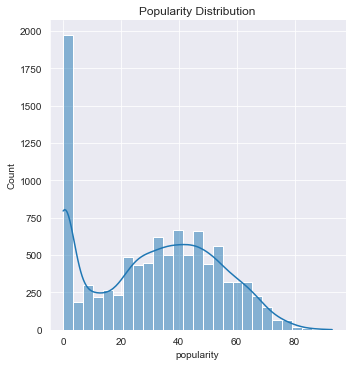

In [6]:
sns.displot(dataframe['popularity'], kde=True)
plt.title('Popularity Distribution')
plt.show()

In [7]:
dataframe.corr()

id   valence      year  acousticness  danceability  \
id                1.000000 -0.038905  0.240255     -0.106881     -0.037550   
valence          -0.038905  1.000000 -0.023340     -0.181083      0.555041   
year              0.240255 -0.023340  1.000000     -0.616553      0.179617   
acousticness     -0.106881 -0.181083 -0.616553      1.000000     -0.263299   
danceability     -0.037550  0.555041  0.179617     -0.263299      1.000000   
duration          0.038966 -0.191517  0.111818     -0.111250     -0.126671   
energy            0.109007  0.342157  0.538514     -0.748026      0.203770   
instrumentalness -0.020617 -0.198932 -0.280544      0.329291     -0.275780   
liveness          0.036613 -0.004654 -0.057493     -0.005874     -0.110652   
loudness          0.066209  0.310310  0.493609     -0.558335      0.268976   
mode             -0.011648  0.003955 -0.028307      0.061363     -0.060246   
popularity       -0.106791  0.020718  0.858713     -0.575481      0.189825   
speechiness      -0.024424  0.036828 -0.174748     -0.050379      0.232992   
tempo             0.020599  0.173929  0.144061     -0.219269     -0.006666   

                  duration    energy  instrumentalness  liveness  loudness  \
id                0.038966  0.109007         -0.020617  0.036613  0.066209   
valence          -0.191517  0.342157         -0.198932 -0.004654  0.310310   
year              0.111818  0.538514         -0.280544 -0.057493  0.493609   
acousticness     -0.111250 -0.748026          0.329291 -0.005874 -0.558335   
danceability     -0.126671  0.203770         -0.275780 -0.110652  0.268976   
duration          1.000000  0.071089          0.072081  0.017510  0.025394   
energy            0.071089  1.000000         -0.283470  0.110493  0.780850   
instrumentalness  0.072081 -0.283470          1.000000 -0.049330 -0.409723   
liveness          0.017510  0.110493         -0.049330  1.000000  0.044706   
loudness          0.025394  0.780850         -0.409723  0.044706  1.000000   
mode             -0.045738 -0.043038         -0.032316 -0.003319 -0.011823   
popularity        0.094376  0.496238         -0.301669 -0.072990  0.463429   
speechiness      -0.093039 -0.071797         -0.124284  0.155242 -0.149928   
tempo            -0.012644  0.265279         -0.115439  0.001253  0.226768   

                      mode  popularity  speechiness     tempo  
id               -0.011648   -0.106791    -0.024424  0.020599  
valence           0.003955    0.020718     0.036828  0.173929  
year             -0.028307    0.858713    -0.174748  0.144061  
acousticness      0.061363   -0.575481    -0.050379 -0.219269  
danceability     -0.060246    0.189825     0.232992 -0.006666  
duration         -0.045738    0.094376    -0.093039 -0.012644  
energy           -0.043038    0.496238    -0.071797  0.265279  
instrumentalness -0.032316   -0.301669    -0.124284 -0.115439  
liveness         -0.003319   -0.072990     0.155242  0.001253  
loudness         -0.011823    0.463429    -0.149928  0.226768  
mode              1.000000   -0.027282    -0.054013  0.022999  
popularity       -0.027282    1.000000    -0.181803  0.137564  
speechiness      -0.054013   -0.181803     1.000000 -0.010583  
tempo             0.022999    0.137564    -0.010583  1.000000

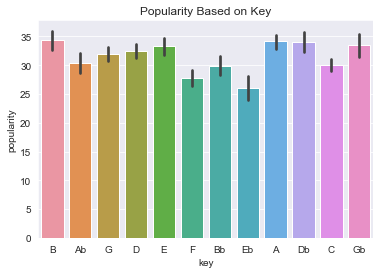

In [8]:
sns.barplot(x='key', y='popularity', data=dataframe)
plt.title('Popularity Based on Key')
plt.show()

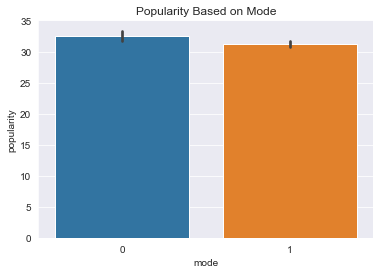

In [9]:
sns.barplot(x='mode', y='popularity', data=dataframe)
plt.title('Popularity Based on Mode')
plt.show()

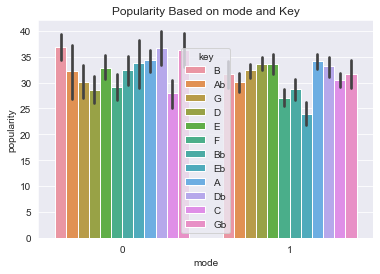

In [10]:
sns.barplot(x='mode', y='popularity', hue='key', data=dataframe)
plt.title('Popularity Based on mode and Key')
plt.show()

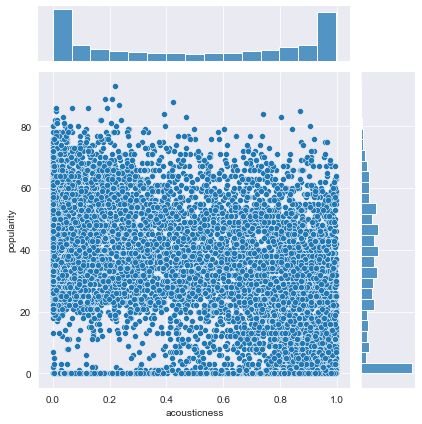

In [11]:
sns.jointplot(x='acousticness', y='popularity', data=dataframe)
plt.show()

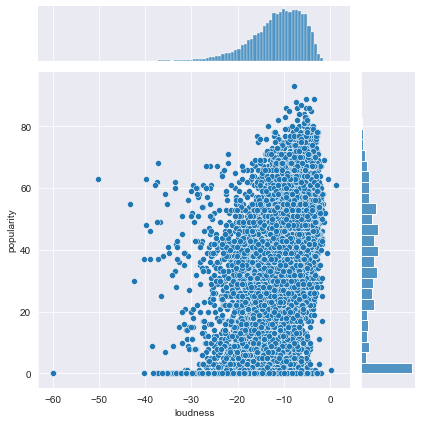

In [12]:
sns.jointplot(x='loudness', y='popularity', data=dataframe)
plt.show()

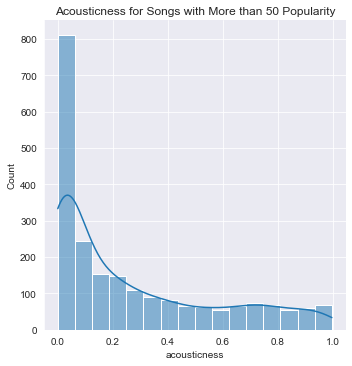

In [13]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.displot(popular_above_50['acousticness'], kde=True)
plt.title('Acousticness for Songs with More than 50 Popularity')
plt.show()

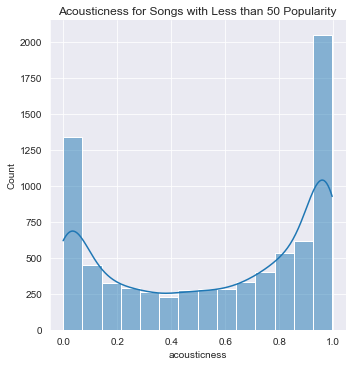

In [14]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.displot(popular_below_50['acousticness'], kde=True)
plt.title('Acousticness for Songs with Less than 50 Popularity')
plt.show()

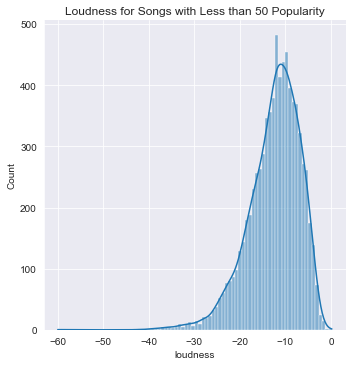

In [15]:
sns.displot(popular_below_50['loudness'], kde=True)
plt.title('Loudness for Songs with Less than 50 Popularity')
plt.show()

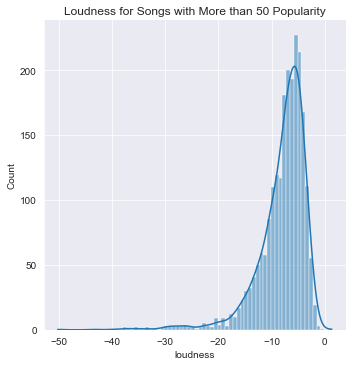

In [16]:
sns.displot(popular_above_50['loudness'], kde=True)
plt.title('Loudness for Songs with More than 50 Popularity')
plt.show()

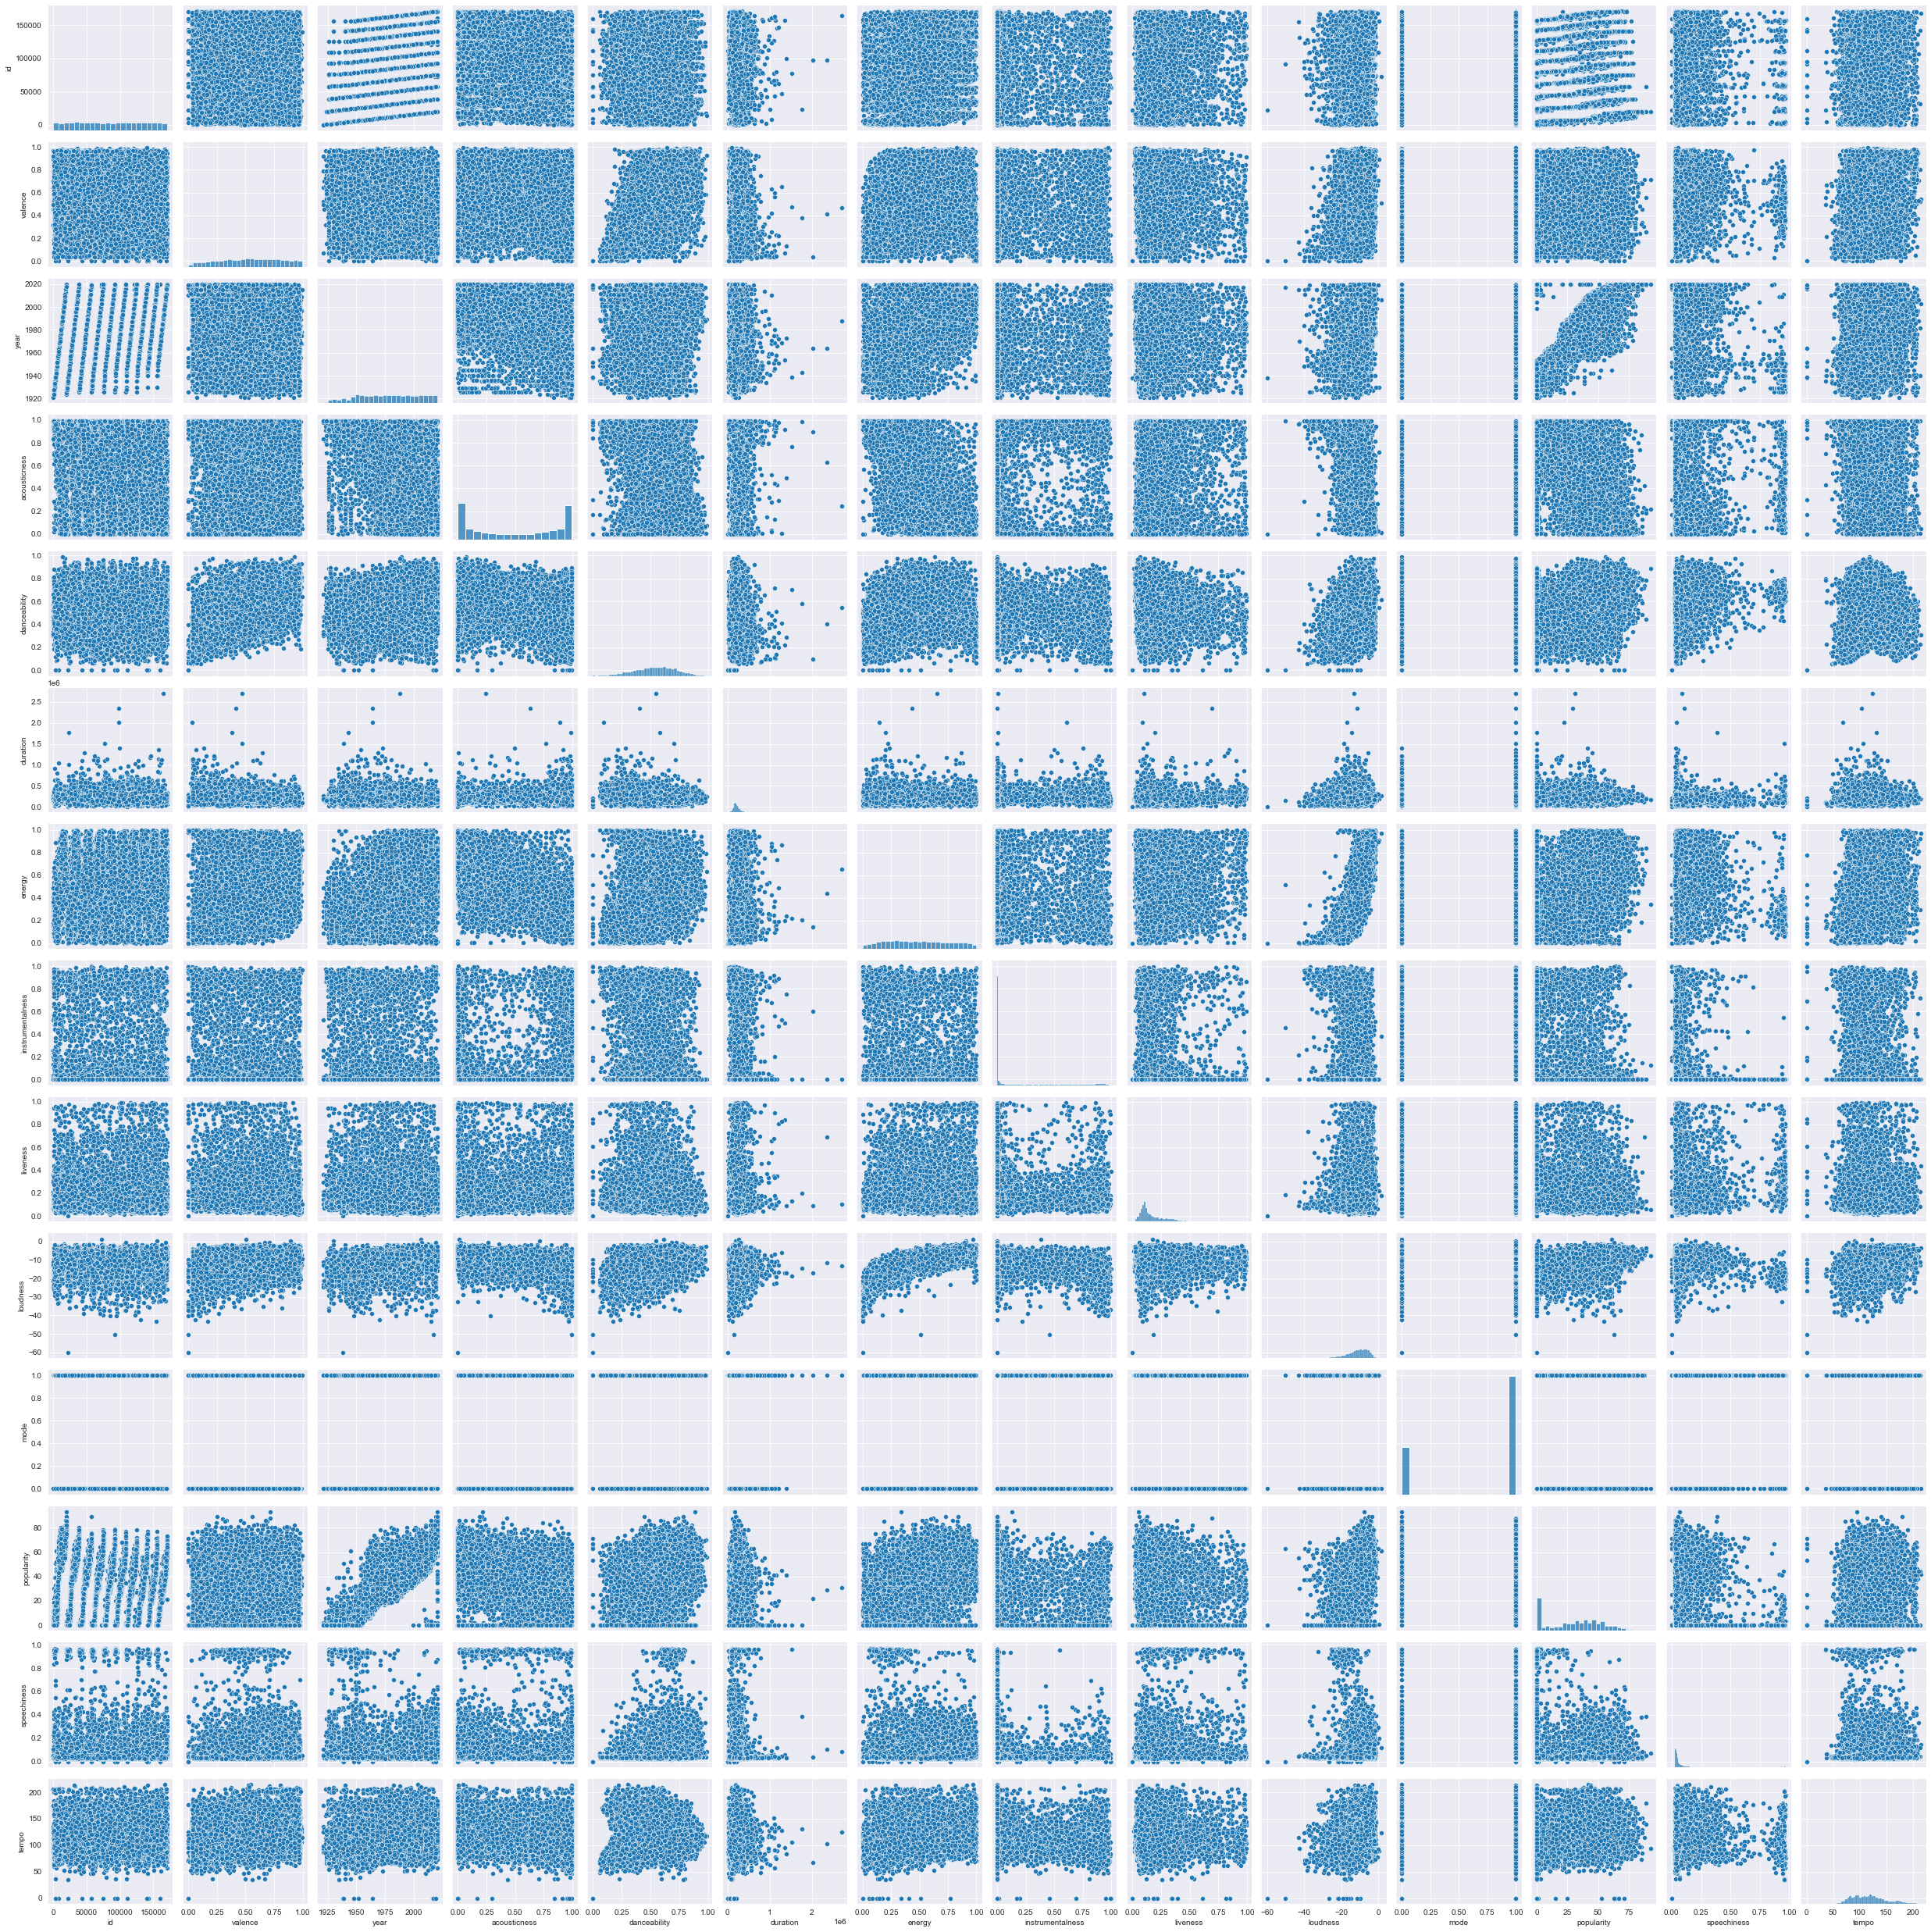

In [17]:
sns.pairplot(dataframe)
plt.show()

In [18]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

id  valence  year  acousticness  danceability  duration  energy  \
7457     152    0.457  1922       0.99400         0.434    181640   0.177   
1988   32800    0.571  1991       0.07590         0.826    243027   0.658   
506   165496    0.596  1994       0.01780         0.326    425240   0.622   
972    14598    0.647  1994       0.02940         0.766    260800   0.793   
6244  164131    0.552  1988       0.00173         0.900    200373   0.627   

      instrumentalness key  liveness  loudness  mode  popularity  speechiness  \
7457          0.021800   9     0.212   -21.180     1           0       0.0512   
1988          0.000019  10     0.235   -10.952     1          51       0.3020   
506           0.019400   8     0.121   -10.492     1          29       0.0318   
972           0.000008   4     0.173    -6.638     0          59       0.1650   
6244          0.000000   4     0.104    -9.567     0          27       0.1370   

        tempo pop.class  
7457  130.418         D  
1988   98.050         B  
506   167.299         C  
972    91.925         B  
6244  124.482         C

In [19]:
dataframe.loc[dataframe['popularity'] < 60, 'popularity'] = 0
dataframe.loc[dataframe['popularity'] >= 60, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]

id  valence  year  acousticness  danceability  duration  energy  \
2      35922    0.423  2007      0.018500         0.470    301093   0.878   
5      38184    0.489  2018      0.371000         0.856    324189   0.694   
8      11675    0.411  1980      0.360000         0.602    312773   0.732   
15     73898    0.516  2014      0.000926         0.855    270054   0.856   
24     57293    0.533  2020      0.171000         0.732    414820   0.634   
...      ...      ...   ...           ...           ...       ...     ...   
9961   11741    0.932  1980      0.004410         0.559    213693   0.764   
9967   14823    0.479  1996      0.563000         0.856    185360   0.517   
9978  155084    0.237  2018      0.649000         0.801    197914   0.650   
9982  124778    0.795  2020      0.054900         0.772    179080   0.925   
9998   91205    0.109  2015      0.269000         0.287    295093   0.430   

      instrumentalness key  liveness  loudness  mode  popularity  speechiness  \
2             0.083900   0    0.2760    -5.576     0           1       0.0377   
5             0.000000   3    0.1090    -4.393     1           1       0.1690   
8             0.000314   3    0.0755    -8.290     1           1       0.0282   
15            0.002710   8    0.9590    -2.574     0           1       0.1050   
24            0.000000   9    0.2040    -5.587     1           1       0.3600   
...                ...  ..       ...       ...   ...         ...          ...   
9961          0.029900   3    0.0807    -7.058     0           1       0.0348   
9967          0.000164  11    0.1440    -9.232     0           1       0.0293   
9978          0.000000  10    0.1090    -7.855     1           1       0.0576   
9982          0.000000   8    0.2010    -2.788     0           1       0.1080   
9998          0.000579   5    0.3200   -10.014     0           1       0.0330   

        tempo pop.class  
2     150.093         A  
5     122.080         A  
8     129.355         A  
15    127.989         A  
24    173.886         A  
...       ...       ...  
9961  143.319         A  
9967  118.399         A  
9978  119.993         A  
9982  119.963         A  
9998   93.984         A  

[1081 rows x 16 columns]

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [21]:
features = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'key',
            'liveness', 'mode', 'speechiness', 'tempo', 'valence']

In [22]:
training = dataframe.sample(frac=2/3, random_state=42)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Logistic Regression

In [24]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
LR_predict = LR_model.predict(X_valid)
LR_accuracy = accuracy_score(y_valid, LR_predict)
print("Accuracy :" + str(LR_accuracy))

LR_AUC = roc_auc_score(y_valid, LR_predict)
print("AUC: " + str(LR_AUC))

Accuracy :0.8875562218890555
AUC: 0.5


## Random Forest Classifier

In [25]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.889055472263868
AUC: 0.532865990990991


## K-Nearest Neighbors Classifier

In [26]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.8800599700149925
AUC: 0.5074211711711711


## Decision Tree Classifier

In [27]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.8103448275862069
AUC: 0.5467454954954954


## Linear Support Vector Classification

In [28]:
LSVC_model = LinearSVC()
LSVC_model.fit(X_train, y_train)
LSVC_predict = LSVC_model.predict(X_valid)
LSVC_accuracy = accuracy_score(y_valid, LSVC_predict)
print("Accuracy: " + str(LSVC_accuracy))

LSVC_AUC = roc_auc_score(y_valid, LSVC_predict)
print("AUC: " + str(LSVC_AUC))

Accuracy: 0.8875562218890555
AUC: 0.5


C:\Users\luis_\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [29]:


model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'Accuracy': [LR_accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC,
                                                         LSVC_AUC]})



In [30]:
model_performance_accuracy.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
1  RandomForestClassifier  0.889055
0      LogisticRegression  0.887556
4               LinearSVC  0.887556
2    KNeighborsClassifier  0.880060
3  DecisionTreeClassifier  0.810345

In [31]:
model_performance_AUC.sort_values(by='AUC', ascending=False)

Model       AUC
3  DecisionTreeClassifier  0.546745
1  RandomForestClassifier  0.532866
2    KNeighborsClassifier  0.507421
0      LogisticRegression  0.500000
4               LinearSVC  0.500000